### Exploring the Iris dataset

In [117]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split

In [59]:
iris = pd.read_csv('iris.data', header=None)

In [65]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [67]:
iris.shape

(150, 5)

In [72]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [73]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

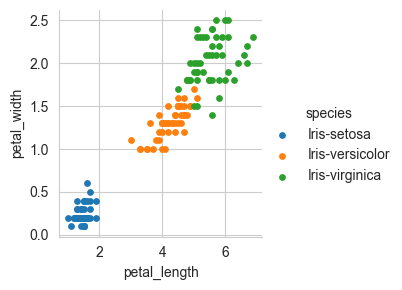

In [111]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue = 'species').map(plt.scatter, 'petal_length', 'petal_width', s=15).add_legend()
plt.show()

In [114]:
# Converting the 'species' column in a numerical column of the iris dataframe

label_encoder = preprocessing.LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])

In [115]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Implementing the own built KNN model

In [118]:
# function for finding Euclidian Distance

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2)**2))
    return distance

In [141]:
class KNN:
    def __init__(self, k = 3):    # default value of k = 3
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def _predict(self, x):
        
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

In [200]:
X = iris.iloc[:, :4].values

In [201]:
y = iris.iloc[:, 4].values

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1234)

In [203]:
classifier = KNN(k = 4)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(predictions)

[1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]


In [204]:
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

1.0


### Scikit-learn implementation of KNN algorithm

In [205]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [206]:
classifier_2 = KNeighborsClassifier(n_neighbors=4)

In [207]:
classifier_2.fit(X_train, y_train)
y_pred = classifier_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


## KNN algorithm on randomly generated dataset

In [245]:
X_1 = np.random.rand(500, 4)
print(X_1.shape)

(500, 4)


In [253]:
y_1 = np.hstack([np.full(100, i) for i in range(5)])
# print(y_1.shape)
'''
hpstack: This is equivalent to concatenation in the direction of column
        but since here our array is 1-D so it is concatenating along the first axis.
             
np.full: numpy.full(shape, fill_value)
        Returns a new array of given shape and dtype(optional), filled with fill_value.

'''   

'\nhpstack: This is equivalent to concatenation in the direction of column\n        but since here our array is 1-D so it is concatenating along the first axis.\n             \nnp.full: numpy.full(shape, fill_value)\n        Returns a new array of given shape and dtype(optional), filled with fill_value.\n\n'

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.20, random_state = 1234)

#### Testing it with the sklearn model

In [248]:
classifier_3 = KNeighborsClassifier(n_neighbors=4)

In [249]:
classifier_3.fit(X_train, y_train)
y_pred = classifier_3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.25


we can see that the accuracy is quite bad as expected

#### Testing it with own built model

In [250]:
classifier_4 = KNN(k = 4)

In [251]:
classifier_4.fit(X_train, y_train)
y_pred = classifier_4.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print(accuracy)

0.19


Similarly, bad accuracy here as well!
By this assessment we can conclude that the KNN algorithm performs quite bad if the data is somewhat random.